In [7]:
import pandas as pd 
data = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/mergedTratado.csv", delimiter = ',',  index_col=0)
data_17_18 = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/1718tratado.csv", delimiter = ',',  index_col=0)
data_18_19 = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/1819tratado.csv", delimiter = ',',  index_col=0)
data_19_20 = pd.read_csv("/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/1920tratado.csv", delimiter = ',',  index_col=0)

data.head()

,nationality,position,age,birth_year,value,height,position2,foot,league,games,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,season_year,classificacao
player,,,,,,,,,,,,,,,,,,,,,
Burgui,ESP,"FW,MF",23.0,1993.0,1800000.0,186.0,attack - Left Winger,right,La Liga,23.0,...,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2018,14.0
Raphaël Varane,FRA,DF,24.0,1993.0,70000000.0,191.0,Defender - Centre-Back,right,La Liga,27.0,...,2.00,83.3,45.4,37.9,1.00,1.0,1.0,0.0,2018,3.0
Rubén Duarte,ESP,DF,21.0,1995.0,2000000.0,179.0,Defender - Left-Back,left,La Liga,24.0,...,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2018,14.0
Samuel Umtiti,FRA,DF,23.0,1993.0,60000000.0,182.0,Defender - Centre-Back,left,La Liga,25.0,...,2.45,78.3,41.1,37.2,0.98,1.0,0.0,0.0,2018,1.0
Manu García,ESP,MF,31.0,1986.0,1800000.0,183.0,midfield - Defensive Midfield,left,La Liga,30.0,...,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2018,14.0


In [ ]:
colunas_numericas = data.select_dtypes(include=[float, int])

# Calcule a correlação entre as variáveis numéricas e a variável alvo
correlacao = colunas_numericas.corrwith(data['value'])

# Criar uma lista para armazenar as colunas a serem removidas
colunas_removidas = []

for coluna in colunas_numericas.columns:
    correlacao_valor = correlacao[coluna]
    #print(f"Coluna: {coluna}, Correlação: {correlacao_valor}")
    
    # Verificar se a correlação é negativa
    if correlacao_valor < 0.2:
        colunas_removidas.append(coluna)

# Remover as colunas com correlação negativa do DataFrame
data = data.drop(colunas_removidas, axis=1)

In [8]:
# Definir o número de bins desejado
num_bins = 4

# Realizar equal-height binning na coluna 'value'
data['bin'] = pd.qcut(data['value'], num_bins, labels=False)

# Obter a contagem de valores em cada bin
bin_counts = data['bin'].value_counts().sort_index()

# Obter os intervalos de valores dos bins
bin_intervals = pd.qcut(data['value'], num_bins, retbins=True)[1]

# Exibir os intervalos de valores dos bins
for i in range(num_bins):
    print(f'Bin {i+1}: {bin_intervals[i]} - {bin_intervals[i+1]}')


Bin 1: 100.0 - 1500000.0
Bin 2: 1500000.0 - 4500000.0
Bin 3: 4500000.0 - 12000000.0
Bin 4: 12000000.0 - 180000000.0


In [9]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['nationality', 'position', 'position2', 'foot', 'league']


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


dropped = data.drop(['value','bin',], axis=1)

# Select the relevant features and target variable
features_scale = dropped.drop([ 'nationality', 'position', 'position2', 'foot', 'league'], axis=1)
features_encode = dropped[[ 'nationality', 'position', 'position2', 'foot', 'league']]
target = data['bin']

# Preprocess the scaled features
scaled_features = features_scale.apply(pd.to_numeric, errors='coerce').values
scaled_features = np.nan_to_num(scaled_features)

# One-hot encode the categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features_encode).toarray()

# Concatenate the scaled features and encoded features
features = np.concatenate((scaled_features, encoded_features), axis=1)

data.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

accuracy: 56.84%
Matriz de Confusão:


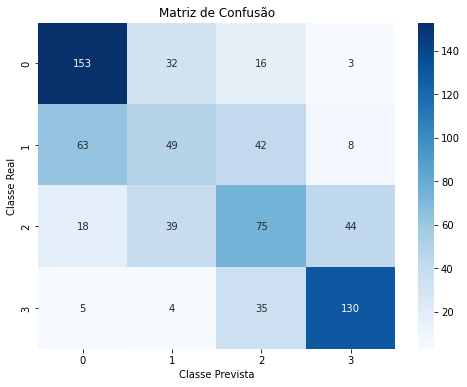

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt





# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=1000,solver='liblinear')

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()


accuracy: 50.14%
Matriz de Confusão:


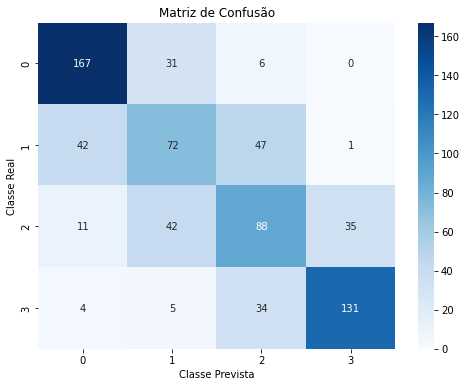

In [20]:

from sklearn.tree import DecisionTreeClassifier

# Criar o modelo de árvore de decisão
model = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

accuracy: 57.40%
Matriz de Confusão:


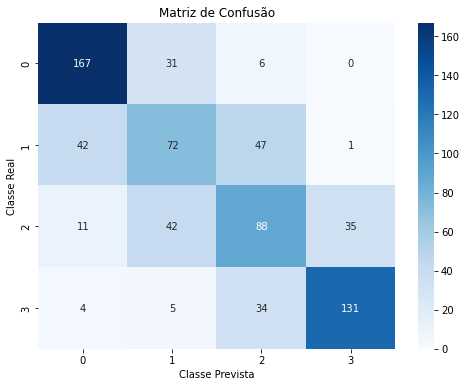

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo de Random Forest
model = RandomForestClassifier(random_state=2022, n_estimators=200, max_depth=10, min_samples_split=5)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

accuracy: 46.09%
Matriz de Confusão:


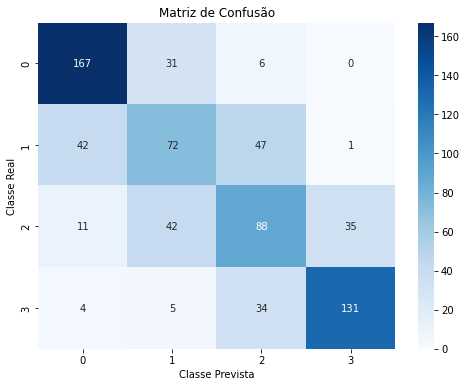

In [18]:
from sklearn.svm import SVC

# Criar o modelo SVM com hiperparâmetros personalizados
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

/home/antoniolmf/anaconda3/envs/daa/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 63.97%
Matriz de Confusão:


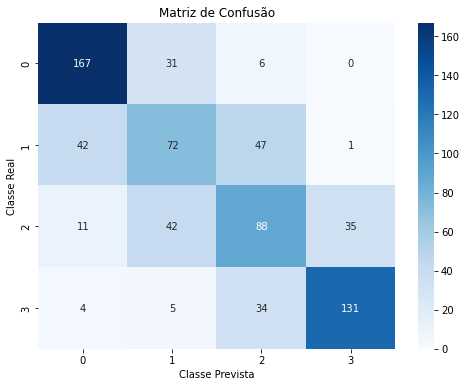

In [15]:
from xgboost import XGBClassifier

# Criar o modelo XGBoost com hiperparâmetros personalizados
model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state = 2022)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)




# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

Mean Squared Error: 0.5013966480446927
Accuracy: 0.6396648044692738
Matriz de Confusão:


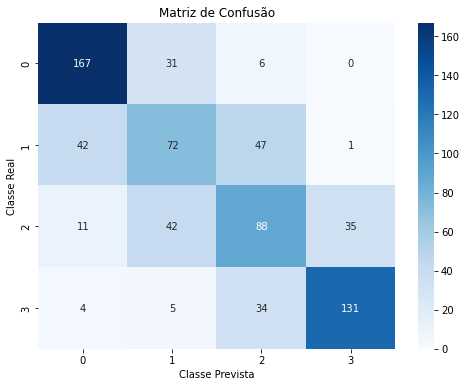

In [17]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

model = lgb.LGBMClassifier(learning_rate=0.01, num_leaves=30, n_estimators=300)
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()